In [1]:
import lstm

Using TensorFlow backend.


In [2]:
import time

In [3]:
import matplotlib.pyplot as plt

In [4]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    
    plt.show()

In [5]:
epoch = 1
seq_len = 50

In [6]:
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', seq_len, True)

In [7]:
model = lstm.build_model([1, 50, 100, 1])

実行時間:  0.03396916389465332


In [8]:
model.fit(X_train, y_train, batch_size=512, nb_epoch=epoch, validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 7s 2ms/step - loss: 0.0028 - val_loss: 0.0012


In [9]:
predictions = lstm.predict_sequence_multiple(model, X_test, seq_len, 50)

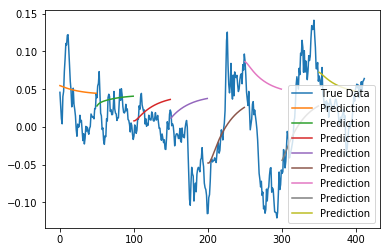

In [10]:
plot_results_multiple(predictions, y_test, 50)